<a href="https://colab.research.google.com/github/i1idan/opencv/blob/master/opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/My \Drive/opencv

/content/drive/My Drive/opencv


width=2828, height=2828, depth=3


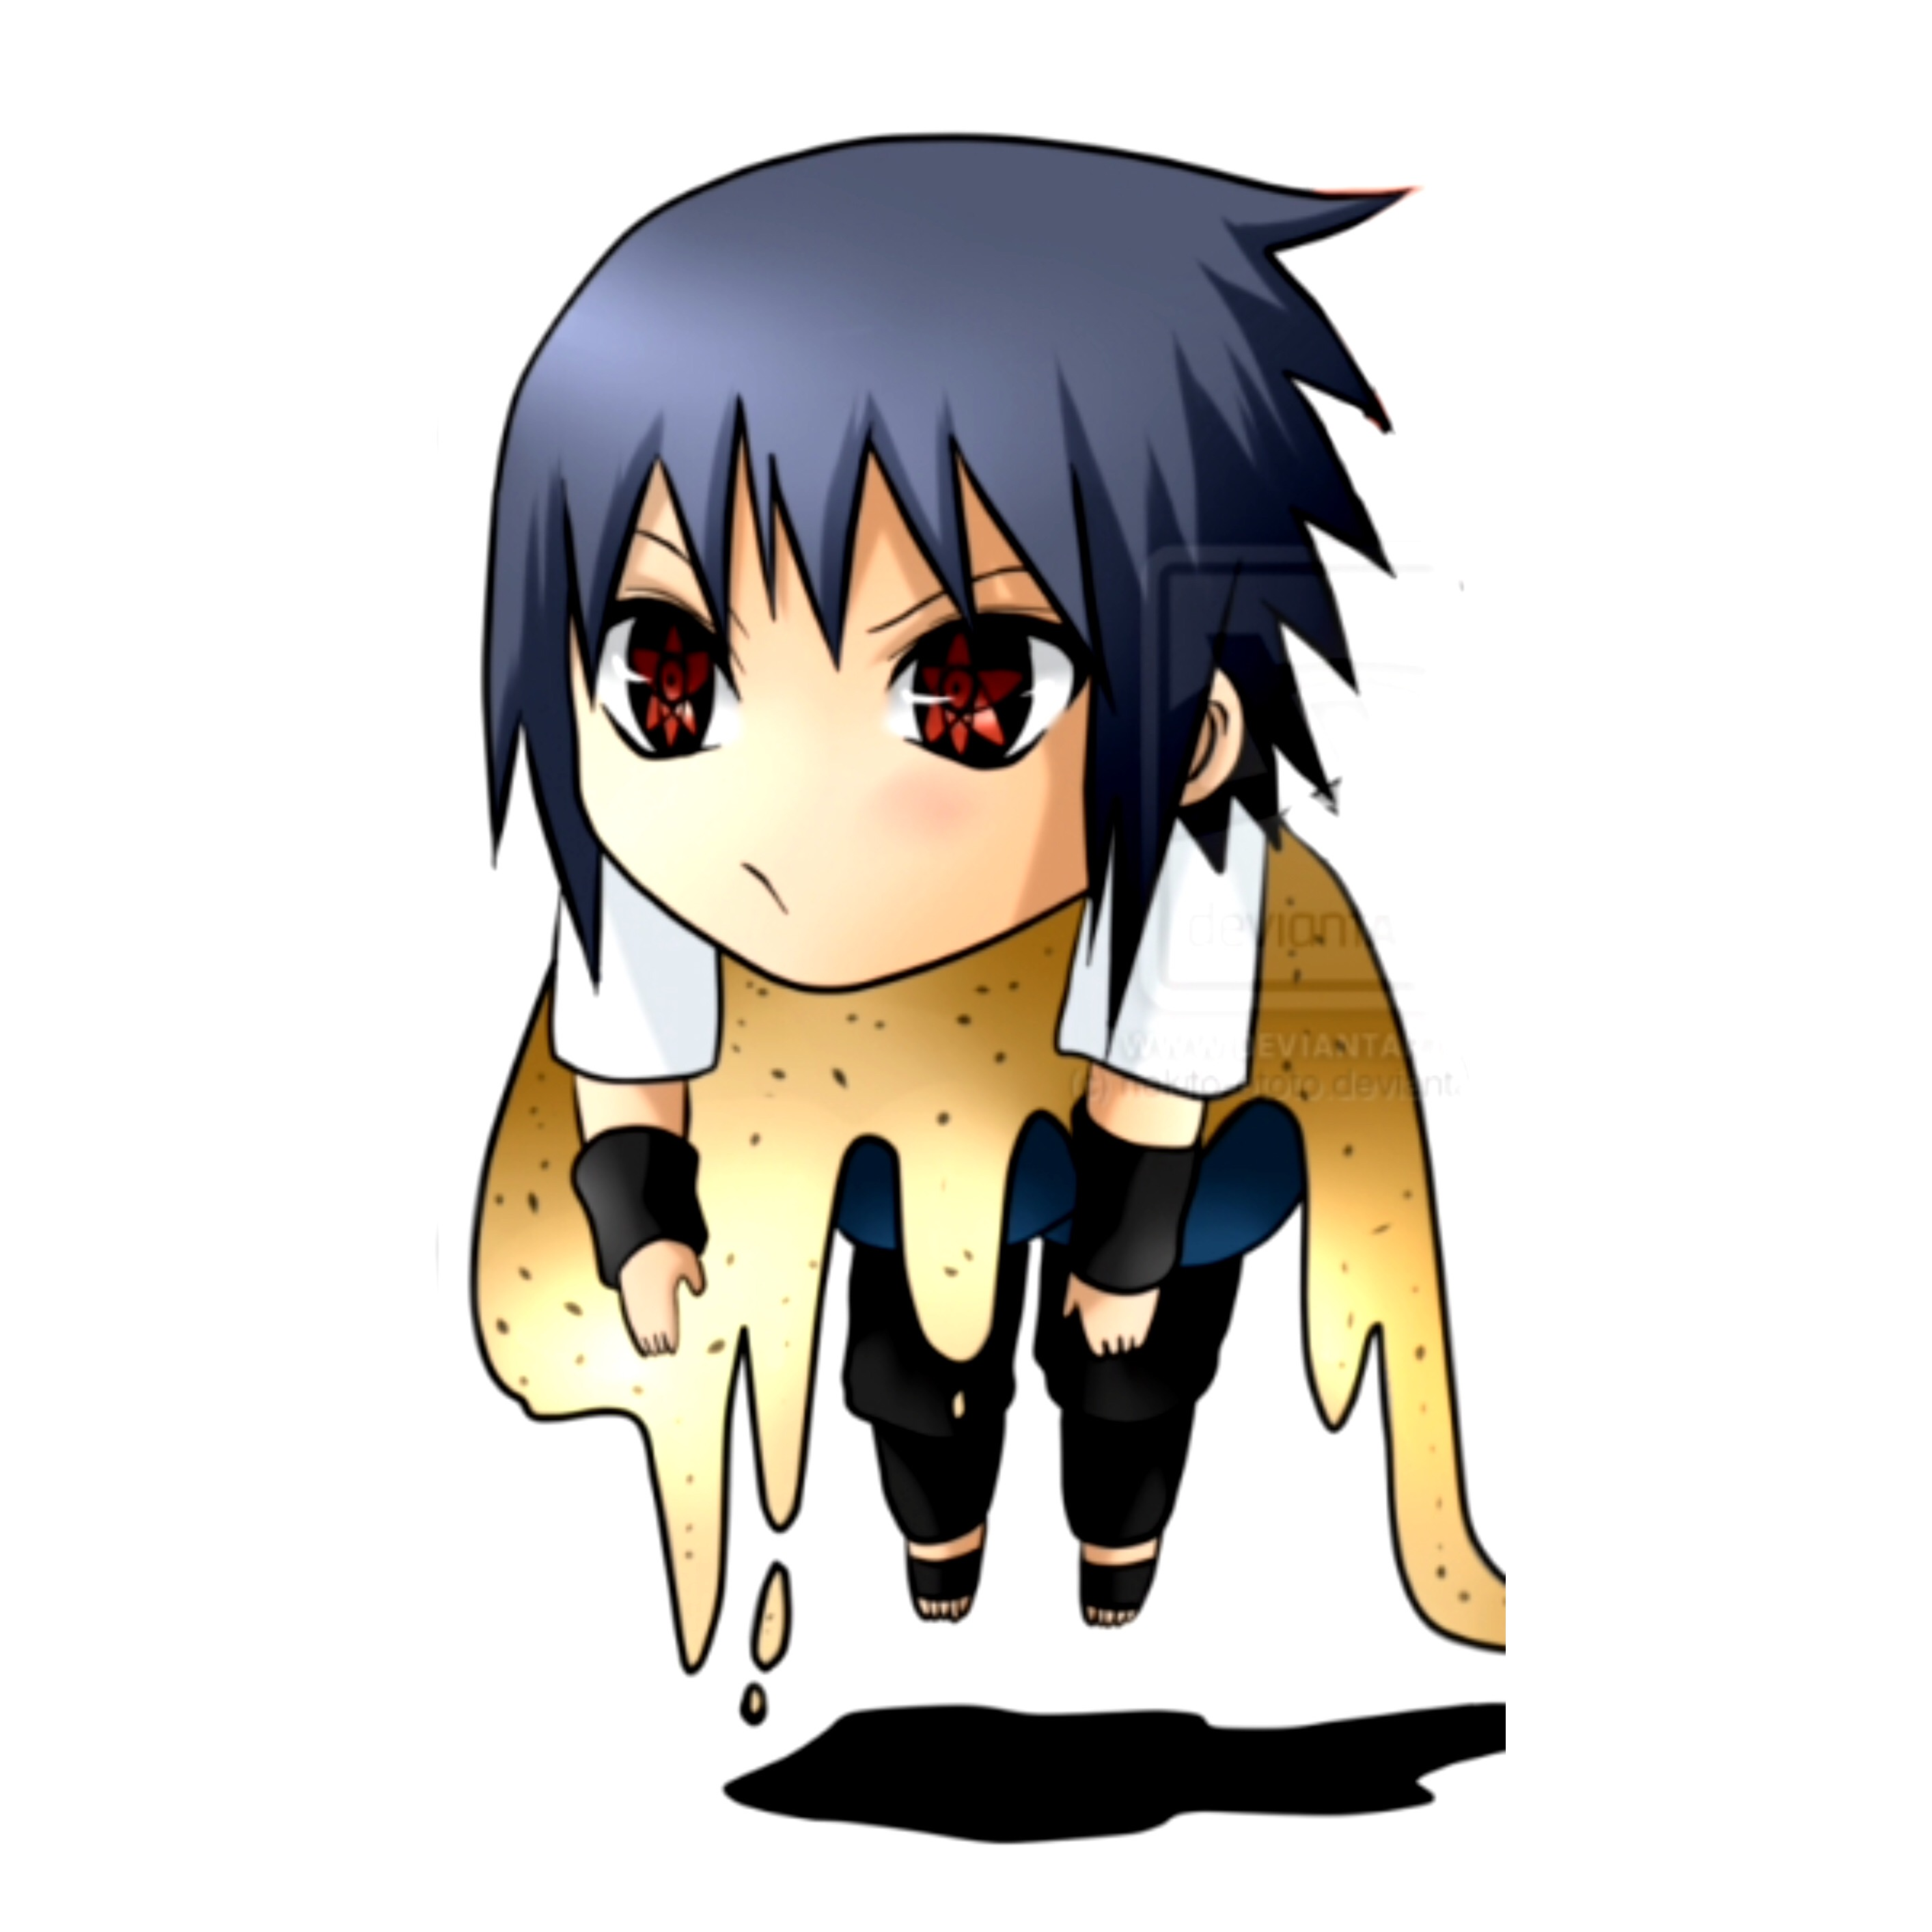

In [3]:

#load and display image
import imutils
import cv2
#image=cv2.imread("covidm.png")
image=cv2.imread("sasuke.JPEG")
(h, w, d)=image.shape
print("width={}, height={}, depth={}".format(w, h, d))

from google.colab.patches import cv2_imshow

%matplotlib inline
cv2_imshow(image)

#cv2.waitkey(0)

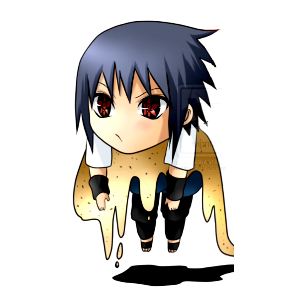

In [4]:
#Resize images
resized=cv2.resize(image, (300,300))
cv2_imshow(resized)

In [0]:
#accessing pixels
(B, G, R)=image[150,100]
print("R={},G={},B={}".format(R,G,B))


R=255,G=255,B=255


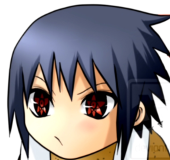

In [0]:
#cropping extracting ROIs
roi=resized[20:180,80:250]
cv2_imshow(roi)

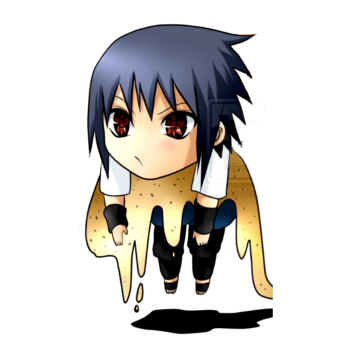

In [5]:
#resizing using imutils in order to avoid making image distroted 
resized=imutils.resize(image, width=350)
cv2_imshow(resized)



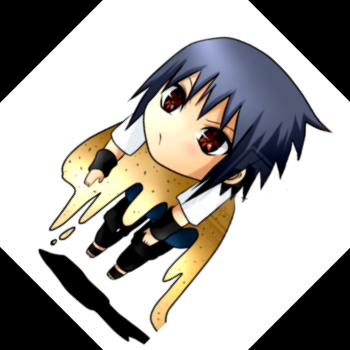

In [0]:
#rotating images
rotated=imutils.rotate(resized,-45)
cv2_imshow(rotated)

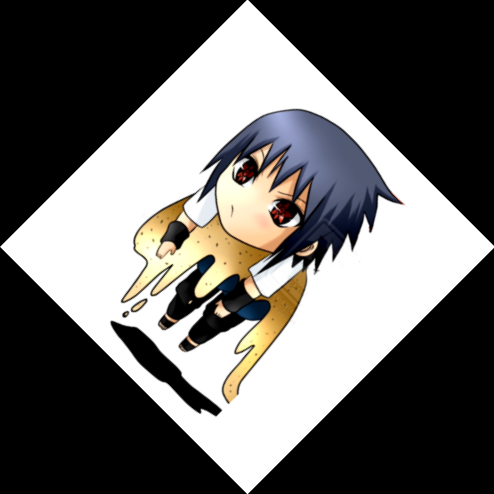

In [0]:
#rotating images
rotated=imutils.rotate_bound(resized,45)
cv2_imshow(rotated)

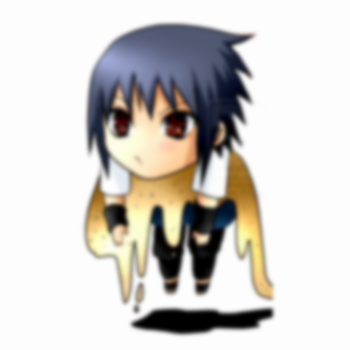

In [6]:
#Smoothing image, reduce high frequency noise
#larger kernels , more blur
#
blurred=cv2.GaussianBlur(resized,(11,11),0)
cv2_imshow(blurred)

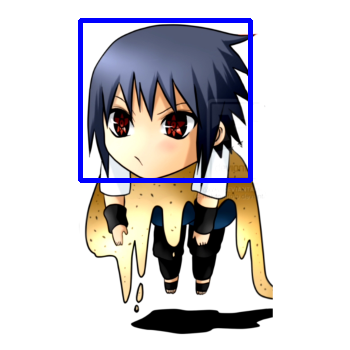

In [0]:
#Draw on image
output=resized.copy()
cv2.rectangle(output,(80,20),(250,180),(255,0,0,),3)
cv2_imshow(output)

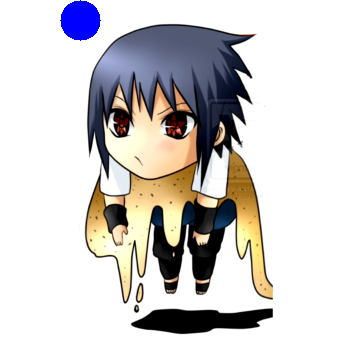

In [0]:
#Draw on image2
output=resized.copy()
cv2.circle(output,(80,20),20,(255,0,0,),-1)
cv2_imshow(output)

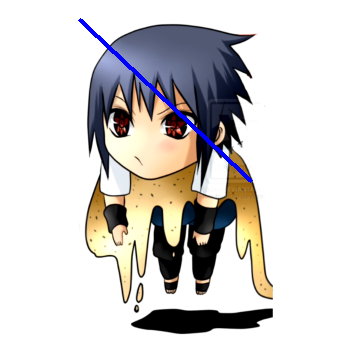

In [0]:
#Draw on image3
output=resized.copy()
cv2.line(output,(80,20),(250,180),(255,0,0,),3)
cv2_imshow(output)

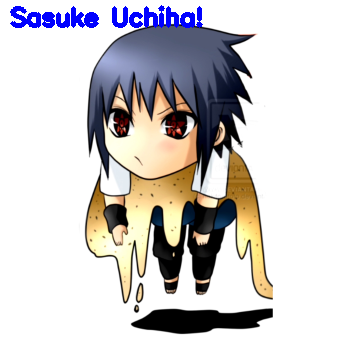

In [0]:
#Draw on image
output=resized.copy()
cv2.putText(output,"Sasuke Uchiha!",(10,25),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0,),3)
cv2_imshow(output)

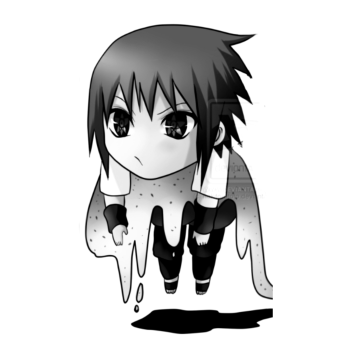

In [7]:
#convert to grayscale
gray=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)


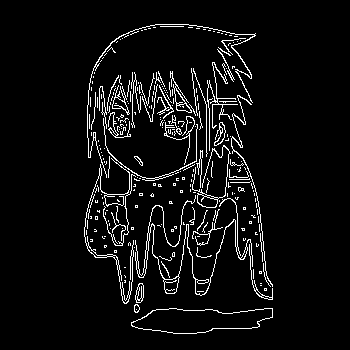

In [8]:
#Edge detection
edged=cv2.Canny(gray,40,100)
cv2_imshow(edged)


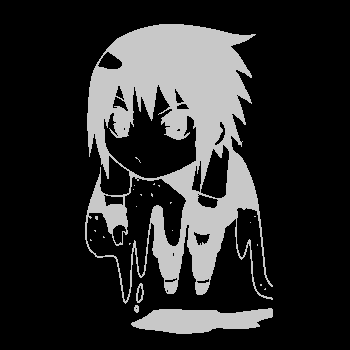

In [9]:
#threshold image
thresh=cv2.threshold(gray,160,200,cv2.THRESH_BINARY_INV)[1]
cv2_imshow(thresh)

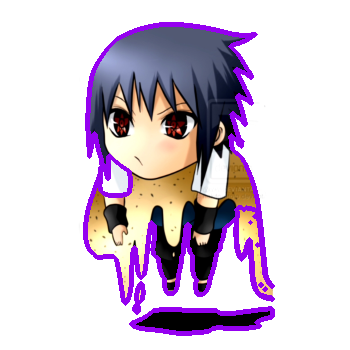

In [10]:
#find contours
cnts=cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts=imutils.grab_contours(cnts)
output=resized.copy()
for c in cnts:
  cv2.drawContours(output,[c],-1,(240,0,149),3)
  
cv2_imshow(output)

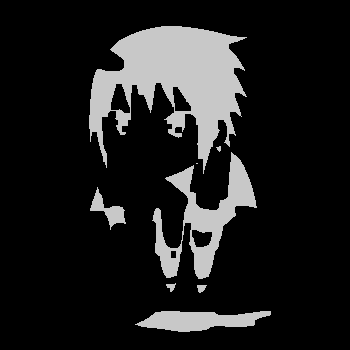

In [11]:
#Erosions and dilations
mask=thresh.copy()
mask=cv2.erode(mask, None,iterations=2)
cv2_imshow(mask)

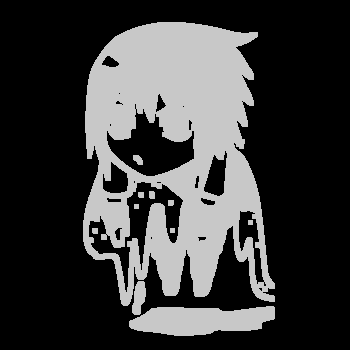

In [12]:
#Erosions and dilations
mask=thresh.copy()
mask=cv2.dilate(mask, None,iterations=2)
cv2_imshow(mask)

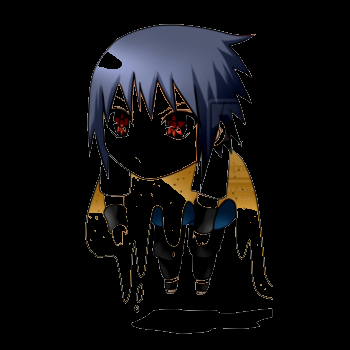

In [13]:
mask=thresh.copy()
output=cv2.bitwise_and(resized,resized,mask=mask)
cv2_imshow(output)

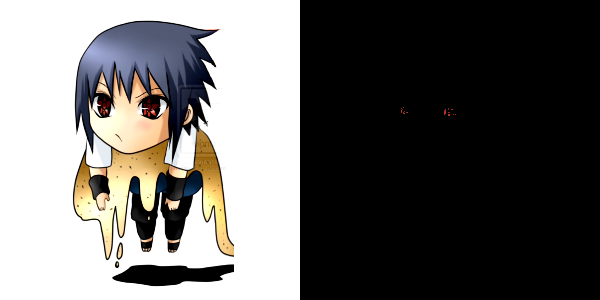

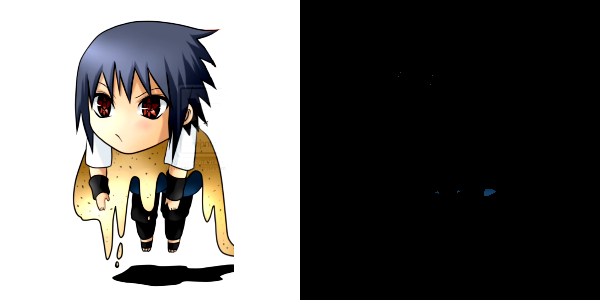

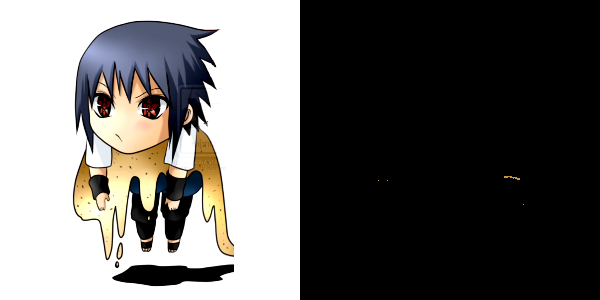

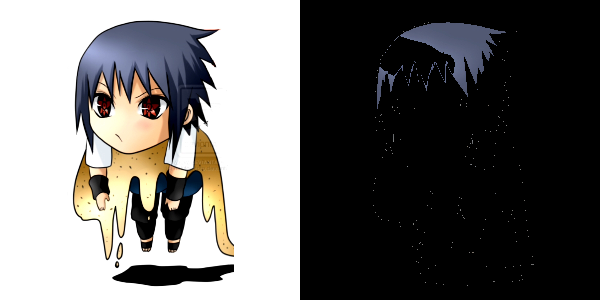

In [0]:
#color Detection
import numpy as np 
import argparse
boundries=[([17,15,100],[50,56,200]),
([86,31,4],[220,88,50]),
([25,146,190],[62,174,250]),
([103,86,65],[145,133,128])]
for (lower,upper) in boundries:
  lower=np.array(lower) 
  upper=np.array(upper)
  mask=cv2.inRange(resized,lower,upper)
  output=cv2.bitwise_and(resized,resized,mask=mask)
  cv2_imshow(np.hstack([resized,output]))